In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline

# Retrieve data function

In [211]:
def get_data():
    columns = ["checking_ac", "duration", "credit_history", "purpose", "amount", "saving_ac",
           "employment_status", "installment_rate", 'personal_status_sex', "debtor_guarantor", "residence_since",
          "property", "age", "installment_plan", "housing", "existing_credits", "job", "liable_count", "telephone",
          "foreign_worker", "target"]
    df = pd.read_csv("./german.data2.csv", delimiter=' ', index_col=False, names=columns)
    
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) < 11:
            cat_cols.append(col)
            df[col]=df[col].astype('category')
    return df

def dist_plot(df, col_name):
    plt.title(i)
    sns.distplot(df[col_name])
    plt.show()
    
def count_plot(df, col_name):
    plt.title(i)
    sns.countplot(df[col_name])
    plt.show()

In [376]:
df = get_data()
columns = df.columns;
num_cols = list(df.iloc[:, :-1]._get_numeric_data().columns)
cat_cols = list(set(columns) - set(num_cols))
print(df.residence_since.head())

0    4
1    2
2    3
3    4
4    4
Name: residence_since, dtype: category
Categories (4, int64): [1, 2, 3, 4]


# Distribution Plot

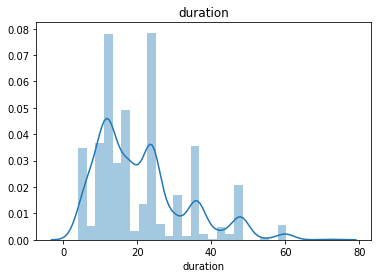

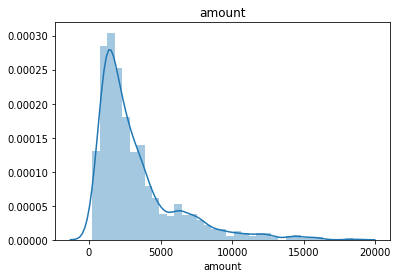

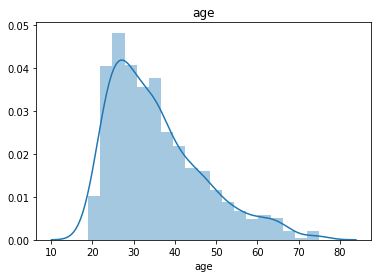

In [213]:
for i in num_cols:
    dist_plot(df, i)

# Count Plot

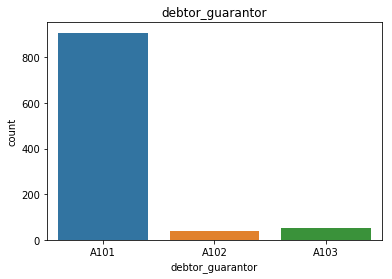

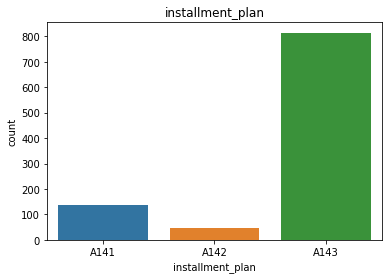

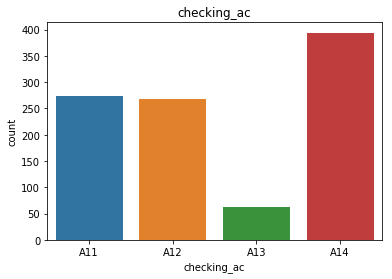

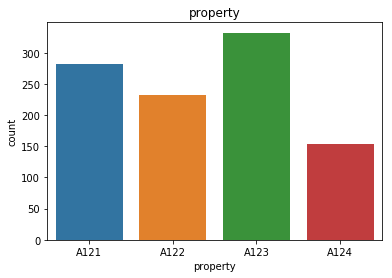

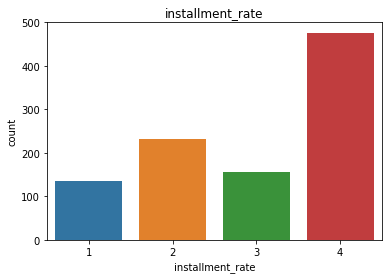

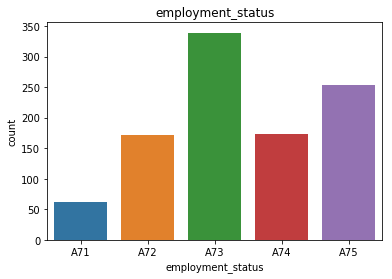

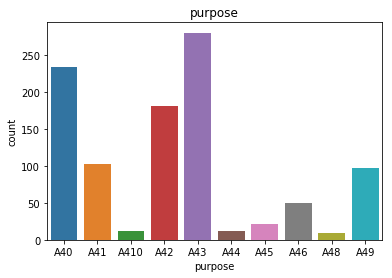

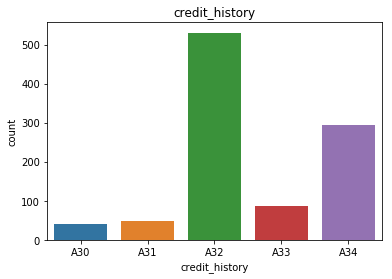

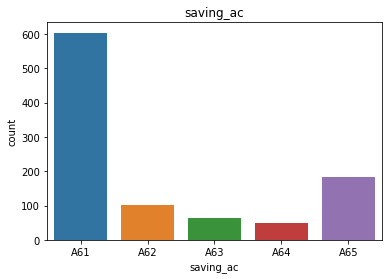

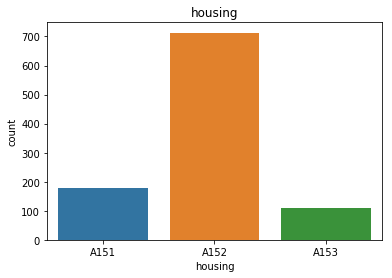

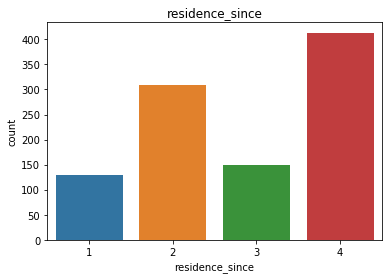

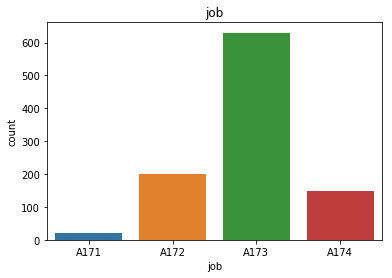

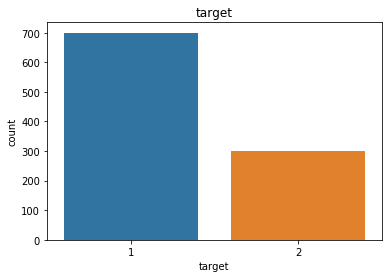

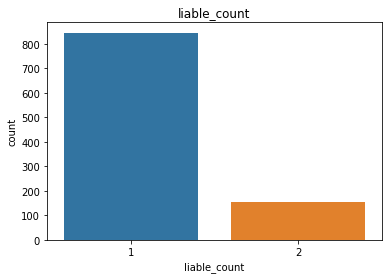

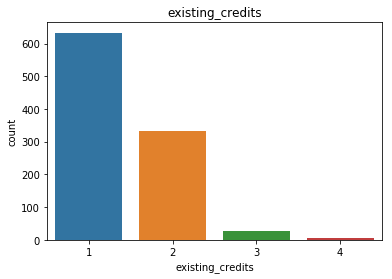

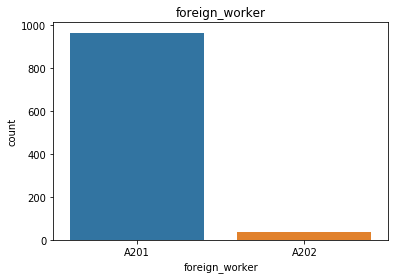

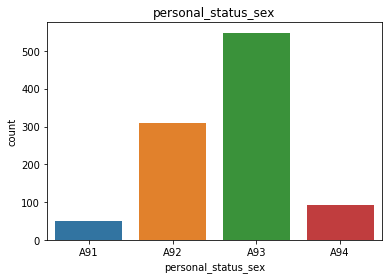

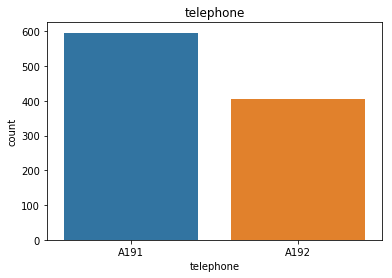

In [214]:
for i in cat_cols:
    count_plot(df, i)
    

# Splitting

In [471]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, 20:21], random_state=2, test_size=0.33)

# Distribution Plot

In [443]:
num_cols_x_train = list(X_train._get_numeric_data().columns)
cat_cols_x_train = list(set(X_train.columns) - set(num_cols))

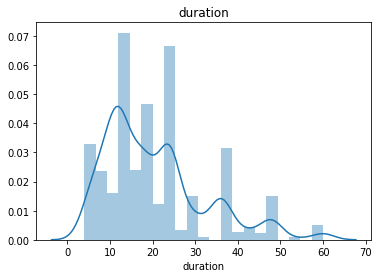

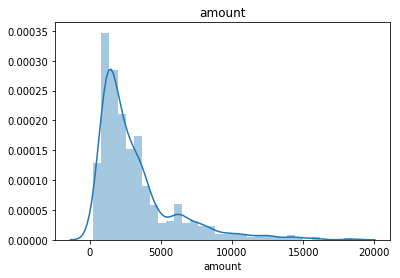

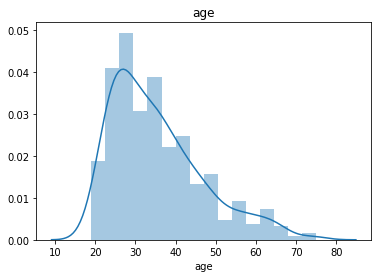

In [217]:
for i in num_cols_x_train:
    dist_plot(X_train, i)

# Univariate Analysis

## Q-Q Plot

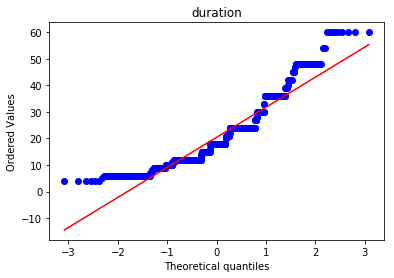

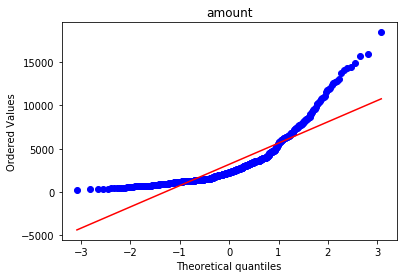

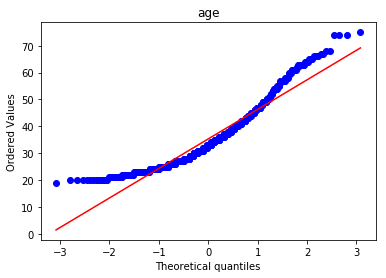

In [219]:
for i in num_cols_x_train:
    stats.probplot(X_train[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

## Box Whisker Plot

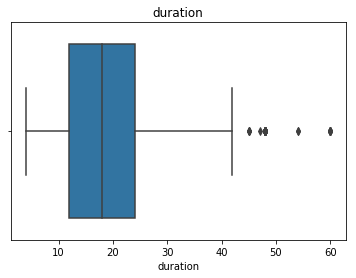

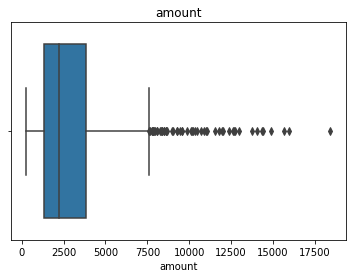

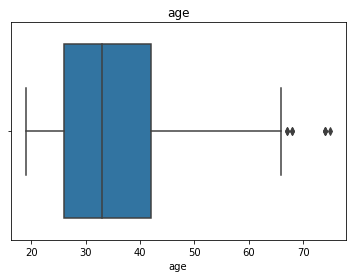

In [220]:
for i in num_cols_x_train:
    plt.title(i)
    sns.boxplot(X_train[i])
    plt.show()

## 5-point Summary

In [221]:
X_train.describe()

,duration,amount,age
count,670.000000,670.000000,670.000000
mean,20.444776,3191.744776,35.329851
std,11.911825,2765.976772,11.425596
min,4.000000,250.000000,19.000000
25%,12.000000,1348.250000,26.000000
50%,18.000000,2252.000000,33.000000
75%,24.000000,3855.250000,42.000000
max,60.000000,18424.000000,75.000000


## Standard Deviation

In [222]:
std_dev = X_train.std(axis=0)
print(std_dev)

duration      11.911825
amount      2765.976772
age           11.425596
dtype: float64


# Bivariate Analysis

## Facet Plot

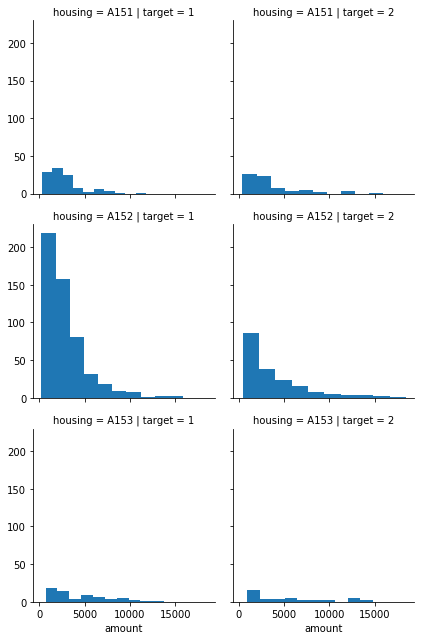

In [246]:
# print(cat_cols_x_train)
g = sns.FacetGrid(df, col="target", row="housing")
g_map = g.map(plt.hist, "amount")

# Multivariate Analysis

## Pair Plot

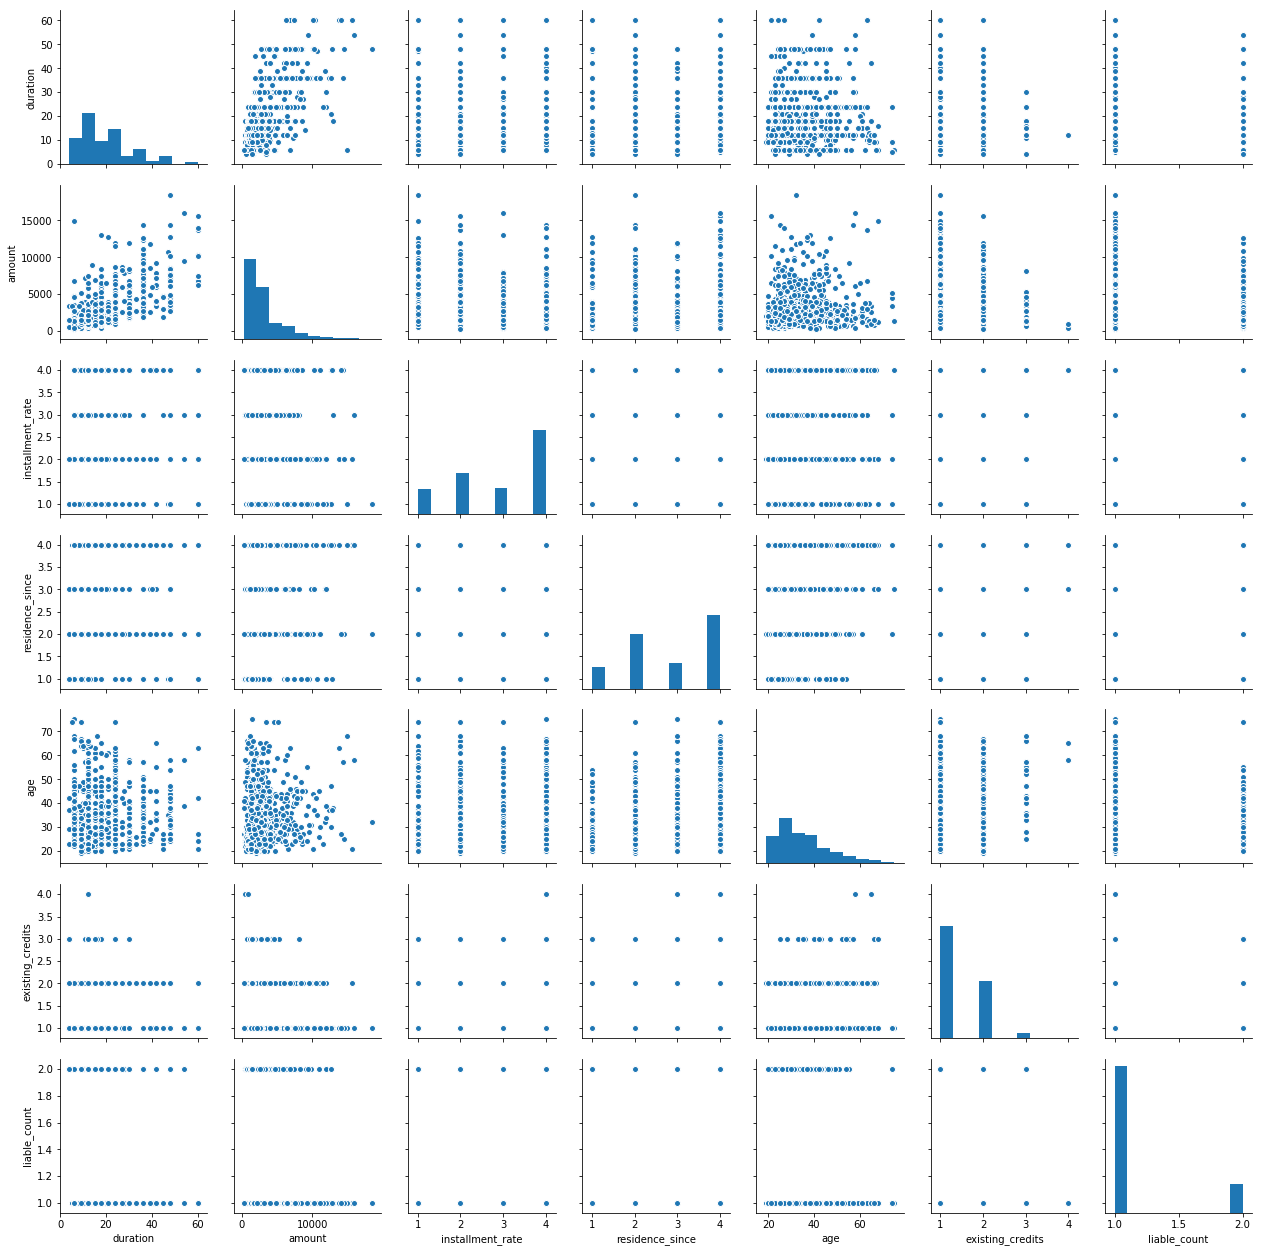

In [224]:
ax_grid = sns.pairplot(X_train)

## Heatmap

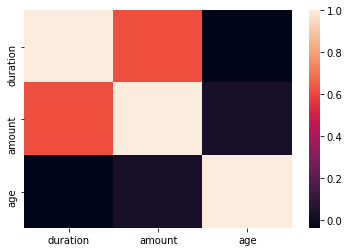

In [225]:
ax = sns.heatmap(X_train.corr())

# Feature Preprocessing

## Missing Value Interpretation

In [417]:
missing_val = df.count() / df.isnull().count()
print(missing_val)

checking_ac            1.0
duration               1.0
credit_history         1.0
purpose                1.0
amount                 1.0
saving_ac              1.0
employment_status      1.0
installment_rate       1.0
personal_status_sex    1.0
debtor_guarantor       1.0
residence_since        1.0
property               1.0
age                    1.0
installment_plan       1.0
housing                1.0
existing_credits       1.0
job                    1.0
liable_count           1.0
telephone              1.0
foreign_worker         1.0
target                 1.0
dtype: float64


## Outliers Treatment

### KDE Plot

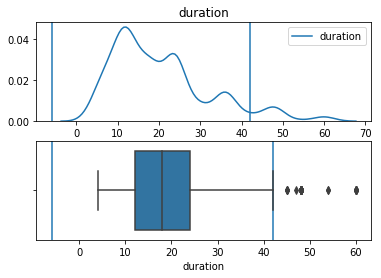

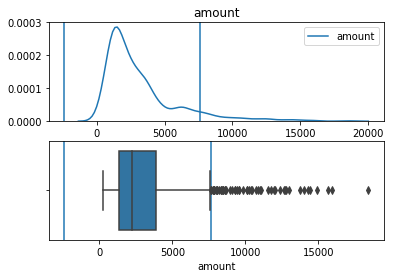

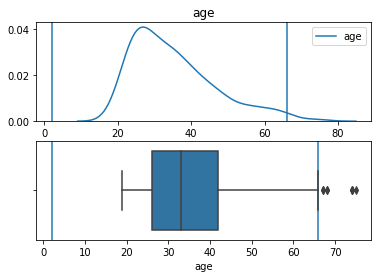

In [444]:
# print(X_train['amount'].loc(3).index)
for i in num_cols_x_train:
    q75, q25 = np.percentile(X_train[i], [75 ,25])
    iqr = q75 - q25
    min_v = q25 - (iqr*1.5)
    max_v = q75 + (iqr*1.5)
    
    plt.subplot(211)
    plt.title(i)
    plt.axvline(x=min_v)
    plt.axvline(x=max_v)
    ax = sns.kdeplot(X_train[i])
    plt.subplot(212)
    plt.axvline(x=min_v)
    plt.axvline(x=max_v)
    ax = sns.boxplot(X_train[i])
    
#     print(X_train[i])
#     if X_train[i] < min and  X_train[i] > max:
#             pass

    plt.show()
    

### Outliers Visualization after transformation

In [445]:
def right_skew_removal(df, col_name):
    df[col_name] = np.log(df[col_name])
    return df[col_name]

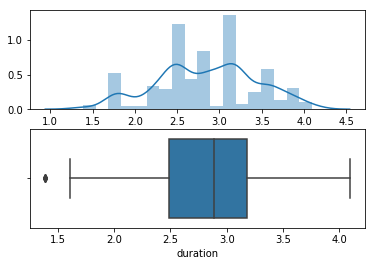

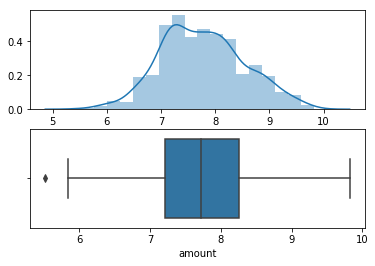

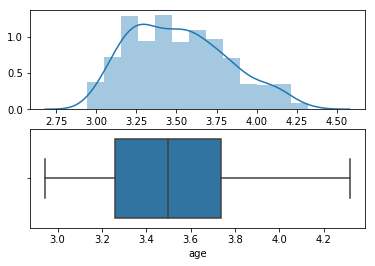

In [446]:
X_train.duration = np.log(X_train.duration)

plt.subplot('211')
sns.distplot(X_train['duration'])
plt.subplot('212')
sns.boxplot(X_train['duration'])
plt.show()

X_train.amount = np.log(X_train.amount)

plt.subplot('211')
sns.distplot(X_train['amount'])
plt.subplot('212')
sns.boxplot(X_train['amount'])
plt.show()

X_train.age = np.log(X_train.age)

plt.subplot('211')
sns.distplot(X_train['age'])
plt.subplot('212')
sns.boxplot(X_train['age'])
plt.show()

### Outliers Removal

In [447]:
def remove_outlier(df, col_name):

    q75, q25 = np.percentile(df[col_name], [75 ,25])
    iqr = q75 - q25
    min_v = q25 - (iqr*1.5)
    max_v = q75 + (iqr*1.5)

    for indx, val in df[col_name].iteritems():
        if val < min_v:
            df[col_name][indx] = min_v
        elif val > max_v:
            df[col_name][indx] = max_v
            
    plt.subplot('211')
    sns.distplot(df[col_name])
    plt.subplot('212')
    sns.boxplot(df[col_name])
    plt.show()

/home/ubuntu/miniconda/envs/credit/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


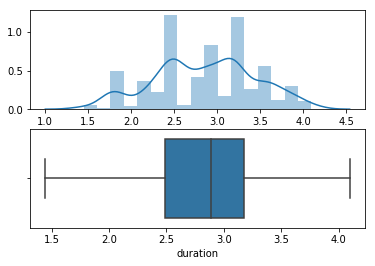

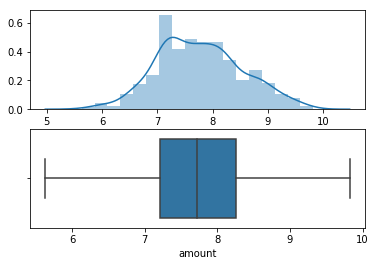

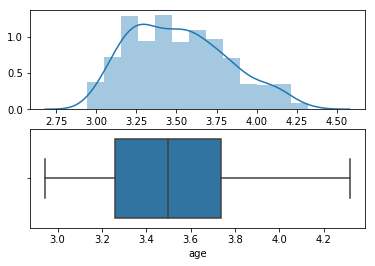

In [448]:
for i in num_cols_x_train:
    remove_outlier(X_train, i)

# Encoding

## Level Encoding

In [472]:
cat_cols = []
for col in X_train.columns:
    if len(X_train[col].unique()) < 11:
        cat_cols.append(col)
        X_train[col]=X_train[col].astype('category')

level_encoding_cols = ["checking_ac", "saving_ac", "employment_status", "installment_rate", "job", "residence_since", "liable_count", "existing_credits"]
one_hot_encoding_cols = list(set(cat_cols_x_train) - set(level_encoding_cols))

In [473]:
def level_encoding(train, test, col_name):
    cols = train[col_name].unique()
    le = LabelEncoder()
    le.fit(cols)
    test[col_name] = le.transform(test[col_name])
    train[col_name] = le.transform(train[col_name])

for i in level_encoding_cols:
    level_encoding(X_train, X_test, i)

## One Hot Encoding

In [475]:
def one_hot_encoding(train, test, col_name):
    x = pd.get_dummies(train[col_name])
    y = pd.get_dummies(test[col_name])
    print(y)
    for i in x.columns:
        train[col_name + ' is ' + i + '?'] = x[i]
        
    for i in y.columns:
        test[col_name + ' is ' + i + '?'] = y[i]

    train.drop(col_name, axis=1, inplace=True)
    test.drop(col_name, axis=1, inplace=True)

# Modeling

## Linear Regression

In [481]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [482]:
model.score(X_test, y_test)

0.2147215423109048

## SVM

In [492]:
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix

clf = svm.SVC()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print(acc)
print(cnf_matrix)
pd.crosstab(y_test, predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.6878787878787879
[[227   0]
 [103   0]]


/home/ubuntu/miniconda/envs/credit/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,1,All
True,,
"(t, a, r, g, e, t)",330,330
All,330,330


# Decision Tree

In [494]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print(acc)
print(cnf_matrix)
pd.crosstab(y_test, predict, rownames=['True'], colnames=['Predicted'], margins=True)

0.6606060606060606
[[175  52]
 [ 60  43]]


Predicted,1,2,All
True,,,
"(t, a, r, g, e, t)",235,95,330
All,235,95,330
